In [37]:
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt


with MPRester("8dx4qZRdlBHi2OUOdhF") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-7885")


    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-7885")

Nous utilisons la brandstructure du matériau pour obtenir le grahique de la structure des bandes de conduction de ce matériau.

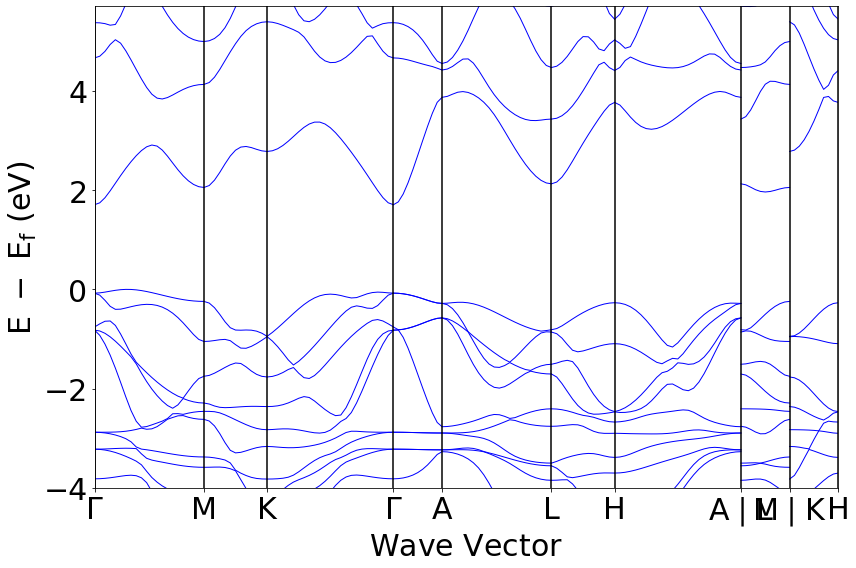

In [38]:
# BSPlotter object

bplot = plotter.BSPlotter(bandstructure)
bplot.show()


# 1) Bande interdite

Nous utilisons la brandstructure du matériau pour obtenir les caractéristiques de sa bande interdite.

In [39]:
data = BSPlotter(bandstructure).bs_plot_data()
en = data.get('energy')
dist = data['distances']

#Data
print("Caractéristiques de la bande interdite :")
print(data.get('band_gap'))

Caractéristiques de la bande interdite :
Indirect (0.143,0.000,0.000)-\Gamma bandgap = 1.7077


Nous remarquons que cette bande interdite a une énergie de 1,7077 eV, la tansition dansn la bande est \Gamma et est la bande interdite est de type indirect. En effet, sur le graphique ci-dessus, nous observons bien que le maximum de la dernière bande de valence n'est pas alligné avec le minimum de la bande de conduction. 

# 2) Dispersion

On s'intéresse d'abord aux propriétés de la bande de valence.

In [40]:
print("Bande de valence :")
print(bandstructure.get_vbm().get('band_index'))
print("La dernière bande de valence est donc la 12ème bande et la plus haute énergie de la bande est de", bandstructure.get_vbm().get('energy'), "eV.")
print()

#Initiation de valeurs
minBranch=-1
minSlope=20.0
maxBranch=-1
maxSlope=0.0

#Boucles pour parcourir le tableau
for i in range(0,len(en)):
    #Pour les énergies
    #Tout à gauche
    vB0 = en[i]['1'][12][0]
    #Tout à droite
    vB1 = en[i]['1'][12][-1]
    #Pour les distances
    #Tout à gauche
    d0 = dist[i][0]
    #Tout à droite
    d1 = dist[i][-1]
    #Pente associée
    m=abs((vB1-vB0)/(d1-d0))
    
    #Détermination max et min 
    #Pour le min
    if m<minSlope:
        minSlope=m
        minBranch=i
        
    #Pour le max
    if m>maxSlope:
        maxSlope=m
        maxBranch=i
        
print("La bande de valence présente le moins de dispersion dans la direction", minSlope,
      "qui se trouve sur la branche délimitée par H et A|L, et présente le plus de dispersion dans la direction",
      maxSlope, "qui se trouve sur la branche délimitée par M|K et H. (Si les directions sont données en valeur absolue).")
print()

#Coordonnées des max et des min pour tracer les flèches

v0x0=dist[minBranch][0]
v0y0=en[minBranch]['1'][12][0]
v0x1=dist[minBranch][-1]
v0y1=en[minBranch]['1'][12][-1]

v1x0=dist[maxBranch][0]
v1y0=en[maxBranch]['1'][12][0]
v1x1=dist[maxBranch][-1]
v1y1=en[maxBranch]['1'][12][-1]

Bande de valence :
defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})
La dernière bande de valence est donc la 12ème bande et la plus haute énergie de la bande est de 4.1028 eV.

La bande de valence présente le moins de dispersion dans la direction 0.011663425786455019 qui se trouve sur la branche délimitée par H et A|L, et présente le plus de dispersion dans la direction 1.4878468713819235 qui se trouve sur la branche délimitée par M|K et H. (Si les directions sont données en valeur absolue).



On s'intéresse ensuite aux propriétés de la bande de conduction.

In [41]:
print("Bande de conduction :")
print(bandstructure.get_cbm().get('band_index'))
print("La première bande de conduction est donc la 13ème bande et la plus basse énergie de la bande est de",
      bandstructure.get_cbm().get('energy'), "eV.")
print()

#Initiation de valeurs
minBranch=-1
minSlope=20.0
maxBranch=-1
maxSlope=0.0

#Boucles pour parcourir le tableau
for i in range(0,len(en)):
    #Pour les énergies
    #Tout à gauche
    cB0 = en[i]['1'][13][0]
    #Tout à droite
    cB1 = en[i]['1'][13][-1]
    #Pour les distances
    #Tout à gauche
    d0 = dist[i][0]
    #Tout à droite
    d1 = dist[i][-1]
    #Pente associée
    m=abs((cB1-cB0)/(d1-d0))
    
    #Détermination max et min 
    #Pour le min
    if m<minSlope:
        minSlope=m
        minBranch=i
        
    #Pour le max
    if m>maxSlope:
        maxSlope=m
        maxBranch=i
        
print("La bande de conduction présente le moins de dispersion dans la direction", minSlope,
      "qui se trouve sur la branche délimitée par H et A|L, et présente le plus de dispersion dans la direction",
      maxSlope, "qui se trouve sur la branche délimitée par Γ et A. (Si les directions sont données en valeur absolue).")
print()

#Coordonnées des max et des min pour tracer les flèches

c0x0=dist[minBranch][0]
c0y0=en[minBranch]['1'][13][0]
c0x1=dist[minBranch][-1]
c0y1=en[minBranch]['1'][13][-1]

c1x0=dist[maxBranch][0]
c1y0=en[maxBranch]['1'][13][0]
c1x1=dist[maxBranch][-1]
c1y1=en[maxBranch]['1'][13][-1]

Bande de conduction :
defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})
La première bande de conduction est donc la 13ème bande et la plus basse énergie de la bande est de 5.8105 eV.

La bande de conduction présente le moins de dispersion dans la direction 0.08679955277311246 qui se trouve sur la branche délimitée par H et A|L, et présente le plus de dispersion dans la direction 4.756235401564913 qui se trouve sur la branche délimitée par Γ et A. (Si les directions sont données en valeur absolue).



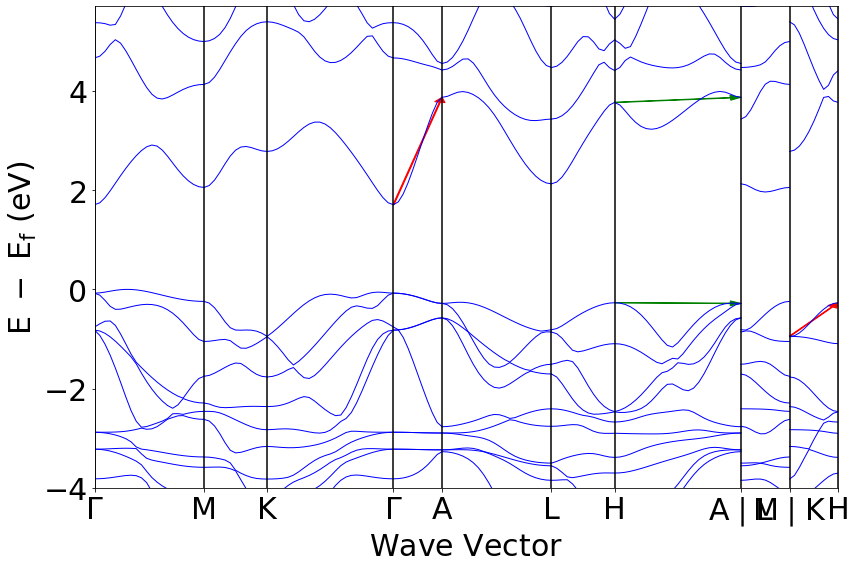

In [42]:
#Graphique avec les flèches correspondantes
BSPlotter(bandstructure).get_plot()

plt.arrow(v0x0,v0y0,v0x1-v0x0,v0y1-v0y0,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green', width=0.01)
plt.arrow(v1x0,v1y0,v1x1-v1x0,v1y1-v1y0,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red', width=0.01)

plt.arrow(c0x0,c0y0,c0x1-c0x0,c0y1-c0y0,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green', width=0.01)
plt.arrow(c1x0,c1y0,c1x1-c1x0,c1y1-c1y0,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red', width=0.01)

# 3) Masse effective

En supposant que la dispersion est parabolique, on peut approximer la masse effective comme étant $$m^* = \dfrac{\hbar^2}{2\varepsilon(k)}\cdot(k_x^2+k_y^2+k_z^2)$$ où k est le point du maximum ou du minimum de bande et $\varepsilon(k)$ est l'énergie liée au maximum ou au minimum de bande.

On s'intérese d'abord à la bande de valence.

In [43]:
h_bar = 6.58212e-16
evToJoule=1.6022e-19
#Coordonnées
kpoint_coord = bandstructure.get_vbm()['kpoint'].cart_coords
kSq=kpoint_coord[0]**2+kpoint_coord[1]**2+kpoint_coord[2]**2
#Energie
en=bandstructure.get_vbm()['energy']*evToJoule
m=(h_bar**2 * kSq)/(2*en)
print("La masse effective au sommet de la dernière bande de valence est de", m, "kg.")



La masse effective au sommet de la dernière bande de valence est de 2.824461370768892e-14 kg.


On s'intéresse ensuite à la bande de conduction.

In [44]:
#Coordonnées
kpoint_coord = bandstructure.get_cbm()['kpoint'].cart_coords
kSq=kpoint_coord[0]**2+kpoint_coord[1]**2+kpoint_coord[2]**2
#Energie
en=bandstructure.get_cbm()['energy']*evToJoule
m=(h_bar**2 * kSq)/(2*en)
print("La masse effective au sommet de la première bande de conduction est de", m, "kg.")

La masse effective au sommet de la première bande de conduction est de 0.0 kg.
